<a href="https://colab.research.google.com/github/wihika/INF0619/blob/main/INF0619_Classificacao_de_revisoes_de_filmes_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final — INF-0619 Classificação de Revisões de Filmes  
Alunos:



#Descrição
O site Rotten Tomatoes é uma plataforma amplamente reconhecida que coleta e exibe avaliações de filmes feitas tanto
por usuários comuns, referidos como audiência, quanto por críticos especializados em cinema, o que proporciona
uma visão abrangente sobre a recepção de um filme. Uma tarefa crítica que surge desse conjunto de dados é a
classificação das avaliações, que pode ser realizada de diferentes maneiras, incluindo a análise do sentimento, que
identifica opiniões expressas nas críticas como positivas, negativas ou neutras, e a atribuição de notas, que facilita
a comparação entre diferentes filmes. Realizar essas análises de forma automática é de grande importância, pois
permite processar uma quantidade significativa de dados de maneira eficiente e precisa, ajudando os usuários a
fazer escolhas informadas sobre quais filmes assistir e fornecendo insights valiosos sobre tendências de recepção
cinematográfica ao longo do tempo.
A base de dados deste projeto contém avaliações de usuários, com notas variando entre 0.5 e 5, de 0.5 em 0.5, e
avaliações de críticos de cinema, com o sentimento associado (positivo ou negativo).

#Objetivo Principal
Este projeto envolve dois problemas, sendo uma tarefa binária e uma tarefa multi-classe, cujo objetivo é predizer
corretamente o sentimento da avaliação do crítico (classificação binária) e a nota de avaliação do usuário (multiclasse) baseado no texto da avaliação. A métrica que deverá ser utilizada neste projeto é a Acurácia Balanceada.

#Técnicas Envolvidas
*   Processamento de linguagem natural;
*   Processamento e representação de dados textuais;
*   Classificação binária;
*   Classificação multi-classe.

#Desafios
*   Para esse projeto, alguns desafios são:
*   Explorar técnicas de processamento de linguagem natural;
*   Analisar as palavras e termos-chaves de cada classe;
*   Lidar com o desbalanceamento de classes;
*   Classificar corretamente o sentimento das revisões dos críticos;
*   Classificar corretamente a nota da avaliação dos usuários.

#Conjunto de Dados
*   Kaggle da base de dados (https://www.kaggle.com/datasets/coltonbarger/rotten-tomatoes-reviews-for-online-streaming-shows/data);
*   Conjunto de dados (https://drive.google.com/drive/folders/10wfbJmPUqfZNs3HY4_Y_Uw1Ef0hFMRU5).


## Instalação das Bibliotecas

Instalar as bibliotecas necessárias:

In [2]:
!pip install pandas
!pip install transformers
!pip install bertviz
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beh

Chamada das bibliotecas necessárias:

In [8]:
import pandas
import numpy
import torch
import seaborn
import matplotlib.pyplot as plot
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import AdamW
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from bertviz import model_view, head_view

## Carregar e preparar os dados

**critic_reviews**
- **Show**: titulo do show avaliado
- **Sentiment**: Sentimento sendo 0 negativo e 1 positivo (2 classes)
- **Review**: conteúdo da avaliação

In [9]:
critic_df = pandas.read_csv("train_critic.csv", header=0)
test_critic_df = pandas.read_csv("test_critic.csv", header=0)

| **Show**                           | **Review**                                                                                       | **Sentiment** |
|------------------------------------|--------------------------------------------------------------------------------------------------|---------------|
| Bodyguard                          | This has been a brilliant, compulsive, five-star drama...                                        | 1             |
| Mad Men                            | With each new season, I try to remind myself that...                                             | 0             |
| 1971: The Year That Music Changed Everything | Here's one of the most all-encompassing and stunning...                                         | 1             |
| Six Feet Under                     | To me, it was one of the most clever, funny, smart...                                            | 1             |
| Pieces of Her                      | Well acted and highly suspenseful, the eight-part drama...                                       | 0             |
| ...                                | ...                                                                                              | ...           |
| Freaks and Geeks                   | Freaks and Geeks boasts an extremely talented cast...                                            | 1             |
| The Gilded Age                     | It's a period piece set in 1882 New York that captures...                                        | 1             |
| Joe vs Carole                      | McKinnon and her co-producers must be credited for...                                            | 1             |
| Rick and Morty                     | As season openers go, this is a really solid entry...                                            | 1             |
| Y: The Last Man                    | Once the show moves past its been-there, watched-that...                                         | 1             |


**audience_reviews**
- **Show**: titulo do show avaliado
- **Rating**: nota do show de 0 a 5, com steps de 0.5 (10 classes)
- **Review**: conteúdo da avaliação

In [10]:
audience_df = pandas.read_csv("train_audience.csv", header=0)
test_audience_df = pandas.read_csv("test_audience.csv", header=0)

| **Show**                | **Review**                                                                                         | **Rating** |
|--------------------------|---------------------------------------------------------------------------------------------------|------------|
| Game of Thrones          | Lost all guidance without the book. Somehow ruined the entire legacy...                          | 0.5        |
| The Book of Boba Fett    | It felt mostly bizarre. Boba Fett himself seems out of place...                                   | 2.5        |
| Safe                     | It started well and got me hooked, but it gets dull by the end...                                 | 3.0        |
| Midnight Mass            | Here's what you get in this series: Long-winded speeches, some clever moments...                 | 2.0        |
| Star Wars: Visions       | I am a big fan of Star Wars and anime, so I really enjoyed this...                                | 4.5        |
| ...                      | ...                                                                                               | ...        |
| Ozark                    | Don't watch the last season - anticlimactic. Very disappointing...                                | 1.0        |
| Game of Thrones          | I wanted to give this higher for the excellent earlier seasons, but the ending ruins it...        | 1.5        |
| Attack on Titan          | This season will make Attack on Titan a masterpiece in storytelling and animation...              | 5.0        |
| Watchmen                 | Looks terrible. Story is about some sort of random nonsense...                                    | 0.5        |
| Peacemaker               | Fun, exciting, well-written, and enjoyable are the words that come to mind for this series...     | 5.0        |


## Variaveis de configuração


Variaveis gerais

In [11]:
IS_TEST = True  # Variavel para deixar as runs menores para testar o codigo mais rapido
MODEL_NAME = "prajjwal1/bert-tiny"  # Escolha o modelo conforme sua necessidade
NUM_EPOCHS = 2 # Número de épocas
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Define como rodar dependendo se houver GPU
MAX_LEN = 256 # Parametro usado no tokenizer

Variaveis Critic

In [12]:
NUM_LABELS_CRITIC = 2 # Número de classes para a base critic
TOKENIZER_CRITIC =  AutoTokenizer.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS_CRITIC)  # Carregar o tokenizer para o critic
MODEL_CRITIC = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS_CRITIC, output_attentions=False, output_hidden_states=False).to(DEVICE)  # Carregar o modelo de classificação para 2 classes

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Variaveis Audience

In [13]:
NUM_LABELS_AUDIENCE = 10 # Número de classes para a base audience
TOKENIZER_AUDIENCE =  AutoTokenizer.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS_AUDIENCE)  # Carregar o tokenizer para o audience
MODEL_AUDIENCE = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS_AUDIENCE, output_attentions=False, output_hidden_states=False).to(DEVICE)   # Carregar o modelo de classificação para 2 classes

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Preparação dos Conjuntos de Dados


Preparação dos dados Critic

In [28]:
critic_df = critic_df.replace([numpy.inf, -numpy.inf], numpy.nan)
critic_df.dropna(inplace=True)
test_critic_df = test_critic_df.replace([numpy.inf, -numpy.inf], numpy.nan)
test_critic_df.dropna(inplace=True)
distinct_sentiment_labels = critic_df.Sentiment.unique()
distinct_sentiment_label_dict = {}
for index, label in enumerate(distinct_sentiment_labels):
    distinct_sentiment_label_dict[label] = index

critic_df['label'] = critic_df.Sentiment.replace(distinct_sentiment_label_dict)
critic_df.label = critic_df.label.astype(int)
test_critic_df['label'] = test_critic_df.Sentiment.replace(distinct_sentiment_label_dict)
test_critic_df.label = test_critic_df.label.astype(int)

critic_df['Review'] = critic_df['Review'].astype(str)
test_critic_df['Review'] = test_critic_df['Review'].astype(str)

train_critic_data, val_critic_data, train_critic_labels, val_critic_labels = train_test_split(critic_df.index.values,
                                                                                              critic_df.label.values,
                                                                                              test_size=0.2, random_state=42,
                                                                                              stratify=critic_df.label.values)

# balanceando os dados de treino
class_weights_critic = compute_class_weight('balanced', classes=numpy.unique(train_critic_labels), y=train_critic_labels)
class_weight_critic_dict = dict(enumerate(class_weights_critic))

In [16]:
critic_df.label.value_counts()

,count
label,
0,9995
1,1836


In [17]:
 pandas.Series(train_critic_labels).value_counts()

,count
0,2008
1,359


In [33]:
encoded_critic_data_train = TOKENIZER_CRITIC.batch_encode_plus(
    critic_df.loc[train_critic_data, 'Review'].values.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length = MAX_LEN,
    return_tensors='pt'
)

encoded_critic_data_val = TOKENIZER_CRITIC.batch_encode_plus(
    critic_df.loc[val_critic_data, 'Review'].values.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length = MAX_LEN,
    return_tensors='pt'
)

encoded_critic_data_test = TOKENIZER_CRITIC.batch_encode_plus(
    test_critic_df.Review.values.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length = MAX_LEN,
    return_tensors='pt'
)

input_ids_train_critic = encoded_critic_data_train['input_ids']
input_ids_val_critic = encoded_critic_data_val['input_ids']
input_ids_test_critic = encoded_critic_data_test['input_ids']

attention_mask_train_critic = encoded_critic_data_train['attention_mask']
attention_mask_val_critic = encoded_critic_data_val['attention_mask']
attention_mask_test_critic = encoded_critic_data_test['attention_mask']

labels_train_critic = torch.tensor(critic_df.loc[train_critic_data, 'label'].values)
labels_val_critic = torch.tensor(critic_df.loc[val_critic_data, 'label'].values)
labels_test_critic = torch.tensor(test_critic_df.label.values)

dataset_train_critic = TensorDataset(input_ids_train_critic, attention_mask_train_critic, labels_train_critic)
dataset_val_critic = TensorDataset(input_ids_val_critic, attention_mask_val_critic, labels_val_critic)
dataset_test_critic = TensorDataset(input_ids_test_critic, attention_mask_test_critic, labels_test_critic)

dataloader_train_critic = DataLoader(dataset_train_critic)
dataloader_val_critic = DataLoader(dataset_val_critic)
dataloader_test_critic = DataLoader(dataset_test_critic)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Preparação dos dados Audience

In [35]:
audience_df = audience_df.replace([numpy.inf, -numpy.inf], numpy.nan)
audience_df.dropna(inplace=True)
test_audience_df = test_audience_df.replace([numpy.inf, -numpy.inf], numpy.nan)
test_audience_df.dropna(inplace=True)
distinct_rating_labels = audience_df.Rating.unique()
distinct_rating_label_dict = {}
for index, label in enumerate(distinct_rating_labels):
    distinct_rating_label_dict[label] = index

audience_df['label'] = audience_df.Rating.replace(distinct_rating_label_dict)
audience_df.label = audience_df.label.astype(int)
test_audience_df['label'] = test_audience_df.Rating.replace(distinct_rating_label_dict)
test_audience_df.label = test_audience_df.label.astype(int)

audience_df['Review'] = audience_df['Review'].astype(str)
test_audience_df['Review'] = test_audience_df['Review'].astype(str)

train_audience_data, val_audience_data, train_audience_labels, val_audience_labels = train_test_split(test_audience_df.index.values,
                                                                                                      test_audience_df.label.values,
                                                                                                      test_size=0.2, random_state=42,
                                                                                                      stratify=test_audience_df.label.values)

# balanceando os dados de treino
class_weights_audience = compute_class_weight('balanced', classes=numpy.unique(train_audience_labels), y=train_audience_labels)
class_weight_audience_dict = dict(enumerate(class_weights_audience))

In [36]:
audience_df.label.value_counts()

,count
label,
5,23642
0,7016
8,3869
4,3792
7,3309
3,2690
6,2340
2,2141
9,2040


In [37]:
 pandas.Series(train_audience_labels).value_counts()

,count
5,4613
0,1439
4,779
8,766
7,707
3,547
6,509
2,430
9,383
1,311


In [39]:
encoded_audience_data_train = TOKENIZER_AUDIENCE.batch_encode_plus(
    audience_df.loc[train_audience_data, 'Review'].values.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length = MAX_LEN,
    return_tensors='pt'
)

encoded_audience_data_val = TOKENIZER_AUDIENCE.batch_encode_plus(
    audience_df.loc[val_audience_data, 'Review'].values.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length = MAX_LEN,
    return_tensors='pt'
)

encoded_audience_data_test = TOKENIZER_AUDIENCE.batch_encode_plus(
    test_audience_df.Review.values.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length = MAX_LEN,
    return_tensors='pt'
)

input_ids_train_audience = encoded_audience_data_train['input_ids']
input_ids_val_audience = encoded_audience_data_val['input_ids']
input_ids_test_audience = encoded_audience_data_test['input_ids']

attention_mask_train_audience = encoded_audience_data_train['attention_mask']
attention_mask_val_audience = encoded_audience_data_val['attention_mask']
attention_mask_test_audience = encoded_audience_data_test['attention_mask']


labels_train_audience = torch.tensor(audience_df.loc[train_audience_data, 'label'].values)
labels_val_audience = torch.tensor(audience_df.loc[val_audience_data, 'label'].values)
labels_test_audience = torch.tensor(test_audience_df.label.values)

dataset_train_audience = TensorDataset(input_ids_train_audience, attention_mask_train_audience, labels_train_audience)
dataset_val_audience = TensorDataset(input_ids_val_audience, attention_mask_val_audience, labels_val_audience)
dataset_test_audience = TensorDataset(input_ids_test_audience, attention_mask_test_audience, labels_test_audience)

dataloader_train_audience = DataLoader(dataset_train_audience)
dataloader_val_audience = DataLoader(dataset_val_audience)
dataloader_test_audience = DataLoader(dataset_test_audience)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

### Funções auxiliares


**Função Test** para testar o modelo, parametros são modelo e o dataloader (inputs, attention masks e labels) usados na avaliação. Retorna o loss, o array com a probabilidade de cada classe possível e os labels verdade usados.

In [40]:
def Test(model, dataloader, device):
    model.eval()

    loss_total = 0
    pred, label = [], []

    for batch in dataloader:
        batch = tuple(b.to(device) for b in batch)
        inputs = {
                    'input_ids': batch[0].to(device),
                    'attention_mask': batch[1].to(device),
                    'labels': batch[2].to(device)
                  }
        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_total = loss_total + loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        pred.append(logits)
        label.append(label_ids)

    average_loss = loss_total/len(dataloader)
    pred = numpy.concatenate(pred, axis=0)
    label = numpy.concatenate(label, axis=0)
    return average_loss, pred, label


**Função Treino** para treinar o modelo, parametros são modelo, nome do modelo, o dataloader de treino (inputs, attention masks e labels), o dataloader de validação, o otimizador, um scheduler (outro tipo de otimizador), numero de épocas e o device (cpu ou gpu) usados no treino. Retorna o modelo treinado.

In [44]:
def Train(model, model_name, dataloader_train, dataloader_val, optimizer, scheduler, num_epochs, device, class_weights):
  train_loss_list = []
  val_loss_list = []
  train_accuracy_list = []
  val_accuracy_list = []
  train_balanced_accuracy_list = []
  val_balanced_accuracy_list = []

  criterion = torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32).to(device))

  for epoch in range(1, num_epochs + 1):
      model.train()

      loss_total = 0
      all_preds = []
      all_labels = []

      for batch in dataloader_train:
          model.zero_grad()

          batch = tuple(b.to(device) for b in batch)

          inputs = {
                      'input_ids': batch[0].to(device),
                      'attention_mask': batch[1].to(device),
                      'labels': batch[2].to(device)
                    }
          outputs = model(**inputs)

          loss = criterion(outputs[1], inputs['labels'])
          loss_total = loss_total + loss.item()
          loss.backward()

          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0).to(device)

          optimizer.step()
          scheduler.step()

          _, preds = torch.max(outputs[1], 1)  # Get predicted class labels
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(batch[2].cpu().numpy())

      torch.save(model.state_dict(), f'finetuned_{model_name}_{epoch}.model')
      print(f'Epoca {epoch}')

      loss_avg_train = loss_total/len(dataloader_train)
      train_loss_list.append(loss_avg_train)
      print(f'Traning Loss: {loss_avg_train}')
      val_loss, preds, labels = Test(model, dataloader_val, device)
      val_loss_list.append(val_loss)
      print(f'Validation Loss: {val_loss}')

      train_accuracy = accuracy_score(all_labels, all_preds)
      train_accuracy_list.append(train_accuracy)
      print(f'Train Accuracy: {train_accuracy}')
      preds_array = numpy.argmax(preds, axis=1)
      val_accuracy = accuracy_score(labels, preds_array)
      val_accuracy_list.append(val_accuracy)
      print(f'Validation Accuracy: {val_accuracy}')

      train_balanced_accuracy = balanced_accuracy_score(all_labels, all_preds)
      train_balanced_accuracy_list.append(train_balanced_accuracy)
      print(f'Train Balanced Accuracy: {train_balanced_accuracy}')
      val_balanced_accuracy = balanced_accuracy_score(labels, preds_array)
      val_balanced_accuracy_list.append(val_balanced_accuracy)
      print(f'Validation Balanced Accuracy: {val_balanced_accuracy}')

  data = {'train_loss': train_loss_list, 'val_loss': val_loss_list, 'train_accuracy': train_accuracy_list, 'val_accuracy': val_accuracy_list, 'train_balanced_accuracy': train_balanced_accuracy_list, 'val_balanced_accuracy': val_balanced_accuracy_list}
  df = pandas.DataFrame(data)

  return model, df

**Função de Plot da Matriz de Confusão** para analisar o modelo, parametros labels verdade, classes preditas, titulo e lista de possiveis classes. Plota a matriz.

In [42]:
def ConfusionMatrix(labels, preds_array, title, classes_list):
  cm = confusion_matrix(labels, preds_array)
  cm_normalized = cm.astype('float') / len(labels)

  plot.figure(figsize=(8, 6))
  seaborn.heatmap(cm_normalized, annot=True, fmt=".0%", cmap="Blues",
              xticklabels=classes_list, yticklabels=classes_list)
  plot.xlabel("Predicted Labels")
  plot.ylabel("True Labels")
  plot.title(title)
  plot.show()

### Treino Modelo

Modelo Critic

In [45]:
optimizer_critic = AdamW(MODEL_CRITIC.parameters(),
                  lr=1e-5)

num_training_steps = len(dataloader_train_critic) * NUM_EPOCHS

num_warmup_steps = int(0.1 * num_training_steps)

scheduler_critic = get_scheduler(
    "linear",
    optimizer=optimizer_critic,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=num_training_steps
)

MODEL_CRITIC, model_critic_train_results = Train(MODEL_CRITIC, 'CRITIC', dataloader_train_critic, dataloader_val_critic, optimizer_critic, scheduler_critic, NUM_EPOCHS, DEVICE, class_weights_critic)

Epoca 1
Traning Loss: 0.6380592279727803
Validation Loss: 0.7076864617128739
Train Accuracy: 0.8436179205409975
Validation Accuracy: 0.8449514152936206
Train Balanced Accuracy: 0.49931207004377737
Validation Balanced Accuracy: 0.5
Epoca 2
Traning Loss: 0.7003747894925034
Validation Loss: 0.7135966159371847
Train Accuracy: 0.8447802197802198
Validation Accuracy: 0.8449514152936206
Train Balanced Accuracy: 0.5
Validation Balanced Accuracy: 0.5


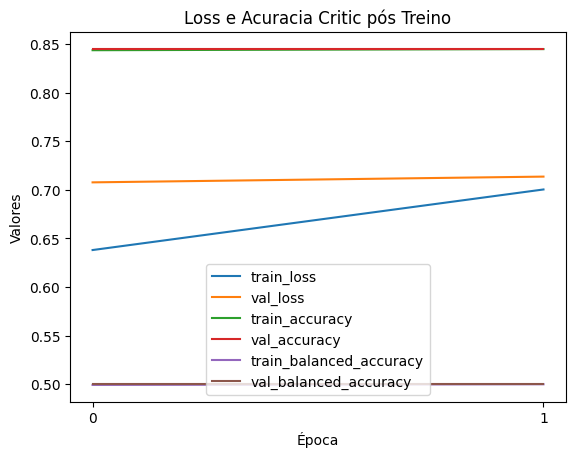

In [46]:
model_critic_train_results.plot(kind='line')
plot.title('Loss e Acuracia Critic pós Treino')
plot.xticks(range(0, len(model_critic_train_results), 1))
plot.xlabel('Época')
plot.ylabel('Valores')
plot.legend(loc='best')
plot.show()

| Época | Treino Loss | Validação Loss | Treino Acurácia | Validação Acurácia | Treino Acurácia Balanceada | Validação Acurácia Balanceada |
|-------|-------------|----------------|------------------|---------------------|----------------------------|-------------------------------|
| 1     | 0.7072      | 0.6993         | 0.5012           | 0.5007              | 0.5014                     | 0.5000                        |
| 2     | 0.7001      | 0.6822         | 0.5080           | 0.5497              | 0.5082                     | 0.5493                        |
| 3     | 0.6796      | 0.6710         | 0.5632           | 0.5769              | 0.5632                     | 0.5773                        |
| 4     | 0.6953      | 1.1087         | 0.6360           | 0.5918              | 0.6360                     | 0.5922                        |
| 5     | 0.9978      | 1.4480         | 0.6793           | 0.6231              | 0.6793                     | 0.6234                        |
| 6     | 1.0355      | 1.4784         | 0.7208           | 0.6490              | 0.7208                     | 0.6492                        |
| 7     | 0.9492      | 1.5060         | 0.7569           | 0.6571              | 0.7569                     | 0.6574                        |
| 8     | 0.8916      | 1.5254         | 0.7838           | 0.6735              | 0.7838                     | 0.6737                        |
| 9     | 0.8183      | 1.5495         | 0.8104           | 0.6816              | 0.8103                     | 0.6818                        |
| 10    | 0.7664      | 1.5677         | 0.8267           | 0.6844              | 0.8267                     | 0.6845                        |
| 11    | 0.7232      | 1.4685         | 0.8407           | 0.7088              | 0.8407                     | 0.7089                        |
| 12    | 0.6697      | 1.5857         | 0.8560           | 0.6966              | 0.8560                     | 0.6967                        |
| 13    | 0.6402      | 1.6149         | 0.8645           | 0.6939              | 0.8645                     | 0.6940                        |
| 14    | 0.5496      | 1.6320         | 0.8880           | 0.6939              | 0.8880                     | 0.6940                        |
| 15    | 0.5590      | 1.7134         | 0.8859           | 0.6939              | 0.8859                     | 0.6940                        |
| 16    | 0.4524      | 1.7934         | 0.9105           | 0.6857              | 0.9104                     | 0.6859                        |
| 17    | 0.4497      | 1.8154         | 0.9105           | 0.6952              | 0.9104                     | 0.6954                        |
| 18    | 0.4377      | 1.8528         | 0.9145           | 0.6966              | 0.9145                     | 0.6968                        |
| 19    | 0.4248      | 1.8596         | 0.9179           | 0.6939              | 0.9179                     | 0.6940                        |
| 20    | 0.4068      | 1.8974         | 0.9227           | 0.6966              | 0.9227                     | 0.6968                        |
| 21    | 0.3879      | 1.8596         | 0.9278           | 0.7034              | 0.9278                     | 0.7035                        |
| 22    | 0.3692      | 1.9001         | 0.9302           | 0.7048              | 0.9302                     | 0.7049                        |
| 23    | 0.3389      | 1.9309         | 0.9336           | 0.7129              | 0.9336                     | 0.7131                        |
| 24    | 0.3178      | 2.0429         | 0.9374           | 0.6871              | 0.9373                     | 0.6873                        |
| 25    | 0.2867      | 2.0153         | 0.9479           | 0.6980              | 0.9479                     | 0.6981                        |
| 26    | 0.2689      | 2.0718         | 0.9520           | 0.6966              | 0.9520                     | 0.6968                        |
| 27    | 0.2876      | 2.0810         | 0.9506           | 0.6993              | 0.9506                     | 0.6995                        |
| 28    | 0.2565      | 2.0449         | 0.9527           | 0.7061              | 0.9527                     | 0.7063                        |
| 29    | 0.2689      | 2.0771         | 0.9510           | 0.7034              | 0.9510                     | 0.7036                        |
| 30    | 0.2439      | 2.0268         | 0.9561           | 0.7224              | 0.9561                     | 0.7226                        |
| 31    | 0.2469      | 2.0382         | 0.9557           | 0.7156              | 0.9557                     | 0.7158                        |
| 32    | 0.2230      | 2.0593         | 0.9605           | 0.7170              | 0.9605                     | 0.7171                        |
| 33    | 0.2595      | 2.0662         | 0.9551           | 0.7116              | 0.9551                     | 0.7117                        |
| 34    | 0.2290      | 2.0728         | 0.9595           | 0.7116              | 0.9595                     | 0.7117                        |
| 35    | 0.2220      | 2.0652         | 0.9629           | 0.7197              | 0.9629                     | 0.7198                        |


Modelo Audience

In [47]:
optimizer_audience = AdamW(MODEL_AUDIENCE.parameters(),
                  lr=1e-5)

num_training_steps = len(dataloader_train_audience) * NUM_EPOCHS

num_warmup_steps = int(0.1 * num_training_steps)

scheduler_audience = get_scheduler(
    "linear",
    optimizer=optimizer_audience,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=num_training_steps
)

MODEL_AUDIENCE, model_audience_train_results = Train(MODEL_AUDIENCE, 'AUDIENCE', dataloader_train_audience, dataloader_val_audience, optimizer_audience, scheduler_audience, NUM_EPOCHS, DEVICE, class_weights_audience)

Epoca 1
Traning Loss: 1.8602758702693756
Validation Loss: 1.686085585560202
Train Accuracy: 0.41949637542922547
Validation Accuracy: 0.45249904616558567
Train Balanced Accuracy: 0.1086410099578295
Validation Balanced Accuracy: 0.1468292694710296
Epoca 2
Traning Loss: 1.7215248615996546
Validation Loss: 1.7567572411887407
Train Accuracy: 0.4812094620373903
Validation Accuracy: 0.48454788248760017
Train Balanced Accuracy: 0.15653007573702768
Validation Balanced Accuracy: 0.15796620077589413


| Epoca | Training Loss | Validation Loss | Train Accuracy | Validation Accuracy | Train Balanced Accuracy | Validation Balanced Accuracy |
|-------|---------------|-----------------|----------------|----------------------|--------------------------|-----------------------------|
| 1     | 2.3076        | 2.2952          | 0.1100         | 0.1170              | 0.1100                  | 0.1171                      |
| 2     | 2.2756        | 2.2313          | 0.1344         | 0.1636              | 0.1343                  | 0.1637                      |
| 3     | 2.1227        | 2.0159          | 0.1994         | 0.2257              | 0.1994                  | 0.2258                      |
| 4     | 1.9660        | 1.9382          | 0.2428         | 0.2438              | 0.2428                  | 0.2439                      |
| 5     | 1.8965        | 1.9425          | 0.2689         | 0.2657              | 0.2689                  | 0.2658                      |
| 6     | 1.8691        | 1.9683          | 0.2845         | 0.2555              | 0.2845                  | 0.2556                      |
| 7     | 1.8491        | 1.9938          | 0.3074         | 0.2670              | 0.3074                  | 0.2671                      |
| 8     | 1.8224        | 2.0254          | 0.3198         | 0.2768              | 0.3198                  | 0.2769                      |
| 9     | 1.7977        | 2.0491          | 0.3387         | 0.2730              | 0.3387                  | 0.2731                      |
| 10    | 1.7690        | 2.0960          | 0.3585         | 0.2663              | 0.3585                  | 0.2664                      |
| 11    | 1.7298        | 2.1217          | 0.3756         | 0.2651              | 0.3755                  | 0.2651                      |
| 12    | 1.7112        | 2.1443          | 0.3897         | 0.2777              | 0.3897                  | 0.2778                      |
| 13    | 1.7004        | 2.1766          | 0.3976         | 0.2730              | 0.3976                  | 0.2731                      |
| 14    | 1.6594        | 2.2213          | 0.4181         | 0.2768              | 0.4181                  | 0.2769                      |
| 15    | 1.6485        | 2.2794          | 0.4216         | 0.2765              | 0.4216                  | 0.2765                      |
| 16    | 1.6385        | 2.3401          | 0.4402         | 0.2708              | 0.4401                  | 0.2708                      |
| 17    | 1.6083        | 2.3982          | 0.4459         | 0.2717              | 0.4458                  | 0.2718                      |
| 18    | 1.5867        | 2.3740          | 0.4595         | 0.2708              | 0.4595                  | 0.2708                      |
| 19    | 1.5657        | 2.4128          | 0.4654         | 0.2628              | 0.4654                  | 0.2629                      |
| 20    | 1.5528        | 2.4242          | 0.4776         | 0.2632              | 0.4776                  | 0.2632                      |
| 21    | 1.5531        | 2.4692          | 0.4757         | 0.2682              | 0.4757                  | 0.2683                      |
| 22    | 1.5250        | 2.4689          | 0.4894         | 0.2676              | 0.4894                  | 0.2676                      |
| 23    | 1.5018        | 2.5186          | 0.4937         | 0.2746              | 0.4937                  | 0.2746                      |
| 24    | 1.4831        | 2.5333          | 0.5093         | 0.2689              | 0.5093                  | 0.2689                      |
| 25    | 1.4878        | 2.5414          | 0.5034         | 0.2651              | 0.5034                  | 0.2651                      |
| 26    | 1.4657        | 2.5630          | 0.5167         | 0.2651              | 0.5167                  | 0.2651                      |
| 27    | 1.4639        | 2.5902          | 0.5160         | 0.2692              | 0.5160                  | 0.2692                      |
| 28    | 1.4489        | 2.6192          | 0.5295         | 0.2692              | 0.5295                  | 0.2692                      |
| 29    | 1.4481        | 2.6046          | 0.5287         | 0.2711              | 0.5287                  | 0.2711                      |
| 30    | 1.4522        | 2.6461          | 0.5249         | 0.2733              | 0.5249                  | 0.2733                      |
| 31    | 1.4476        | 2.6654          | 0.5251         | 0.2692              | 0.5251                  | 0.2692                      |
| 32    | 1.4314        | 2.6581          | 0.5363         | 0.2685              | 0.5363                  | 0.2686                      |
| 33    | 1.4363        | 2.6855          | 0.5287         | 0.2730              | 0.5287                  | 0.2730                      |
| 34    | 1.4286        | 2.6901          | 0.5362         | 0.2724              | 0.5362                  | 0.2724                      |
| 35    | 1.4139        | 2.6866          | 0.5409         | 0.2695              | 0.5409                  | 0.2695                      |


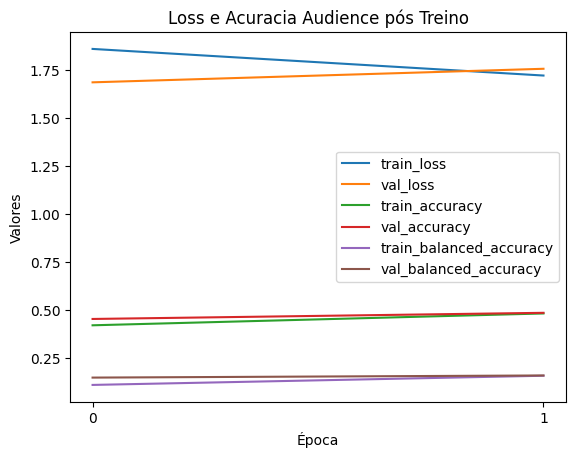

In [48]:
model_audience_train_results.plot(kind='line')
plot.title('Loss e Acuracia Audience pós Treino')
plot.xticks(range(0, len(model_audience_train_results), 1))
plot.xlabel('Época')
plot.ylabel('Valores')
plot.legend(loc='best')
plot.show()

### Avaliação do Modelo no Conjunto Test

Modelo Critic

In [ ]:
best_epoch_critic = 1
model_config_critic = f'finetuned_CRITIC_{best_epoch_critic}.model'
best_model_critic = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS_CRITIC, output_attentions=True, output_hidden_states=False)
best_model_critic.load_state_dict(torch.load(model_config_critic, map_location=torch.device('cpu')))
best_model_critic.to(DEVICE)

print("Melhor modelo")
_, preds, labels = Test(best_model_critic, dataloader_test_critic, DEVICE)
print(f'Test Loss: {_}')
preds_array = numpy.argmax(preds, axis=1)
val_accuracy_2 = accuracy_score(labels, preds_array)
print(f'Test Accuracy: {val_accuracy_2}')
val_balanced_accuracy_2 = balanced_accuracy_score(labels, preds_array)
print(f'Test Balanced Accuracy: {val_balanced_accuracy_2}')

ConfusionMatrix(labels, preds_array, title="Matrix de confusão - Modelo Critic", classes_list=distinct_sentiment_labels)

Modelo Audience

In [ ]:
best_epoch_audience = 1
model_config_audience = f'finetuned_AUDIENCE_{best_epoch_audience}.model'
best_model_audience = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS_AUDIENCE, output_attentions=True, output_hidden_states=False)
best_model_audience.load_state_dict(torch.load(model_config_audience, map_location=torch.device('cpu')))
best_model_audience.to(DEVICE)

print("Melhor modelo")
_, preds, labels = Test(best_model_audience, dataloader_test_audience, DEVICE)
print(f'Test Loss: {_}')
preds_array = numpy.argmax(preds, axis=1)
val_accuracy_2 = accuracy_score(labels, preds_array)
print(f'Test Accuracy: {val_accuracy_2}')
val_balanced_accuracy_2 = balanced_accuracy_score(labels, preds_array)
print(f'Test Balanced Accuracy: {val_balanced_accuracy_2}')

ConfusionMatrix(labels, preds_array, title="Matrix de confusão - Modelo Audience", classes_list=distinct_rating_labels)

### Análise do Mecanismo de Atenção com BertViz



Modelo Critic

In [ ]:
input_ids=[]
for batch in dataloader_test_critic:
    input_ids.append(batch[0])

print(f'Modelo Critic')
correct_cases_critic = [(text, true, pred) for text, true, pred in zip(input_ids, labels_test_critic, preds_array) if true == pred]
print(f'Número de acertos: {len(correct_cases_critic)}')

decoded_correct_text_critic = TOKENIZER_CRITIC.decode(torch.tensor(correct_cases_critic[0][0][0].tolist()), skip_special_tokens=True)
print(f'Texto caso correto: {decoded_correct_text_critic}')

incorrect_cases_critic =[(text, true, pred) for text, true, pred in zip(input_ids, labels_test_critic, preds_array) if true != pred]
print(f'Número de incorretos: {len(incorrect_cases_critic)}')

decoded_incorrect_text_critic = TOKENIZER_CRITIC.decode(torch.tensor(incorrect_cases_critic[0][0][0].tolist()), skip_special_tokens=True)
print(f'Texto caso incorreto: {decoded_incorrect_text_critic}')

In [ ]:
model = best_model_critic
print("Análise para um comentário que foi corretamente predito")
inputs = TOKENIZER_CRITIC.encode(decoded_correct_text_critic, return_tensors='pt').to(DEVICE)
outputs = model(inputs)
attention = outputs[-1]
tokens = TOKENIZER_CRITIC.convert_ids_to_tokens(inputs[0])
head_view(attention, tokens)
model_view(attention, tokens)

print("Análise para um comentário que foi incorretamente predito")
inputs = TOKENIZER_CRITIC.encode(decoded_incorrect_text_critic, return_tensors='pt').to(DEVICE)
outputs = model(inputs)
attention = outputs[-1]
tokens = TOKENIZER_CRITIC.convert_ids_to_tokens(inputs[0])
head_view(attention, tokens)
model_view(attention, tokens)

Modelo Audience

In [ ]:
input_ids=[]
for batch in dataloader_test_audience:
    input_ids.append(batch[0])

print(f'Modelo Audience')
correct_cases_audience = [(text, true, pred) for text, true, pred in zip(input_ids, labels_test_audience, preds_array) if true == pred]
print(f'Número de acertos: {len(correct_cases_audience)}')

decoded_correct_text_audience = TOKENIZER_AUDIENCE.decode(torch.tensor(correct_cases_audience[0][0][0].tolist()), skip_special_tokens=True)
print(f'Texto caso correto: {decoded_correct_text_audience}')

incorrect_cases_audience =[(text, true, pred) for text, true, pred in zip(input_ids, labels_test_audience, preds_array) if true != pred]
print(f'Número de incorretos: {len(incorrect_cases_audience)}')

decoded_incorrect_text_audience = TOKENIZER_AUDIENCE.decode(torch.tensor(incorrect_cases_audience[0][0][0].tolist()), skip_special_tokens=True)
print(f'Texto caso incorreto: {decoded_incorrect_text_audience}')

In [ ]:
model = best_model_audience
print("Análise para um comentário que foi corretamente predito")
inputs = TOKENIZER_AUDIENCE.encode(decoded_correct_text_audience, return_tensors='pt').to(DEVICE)
outputs = model(inputs)
attention = outputs[-1]
tokens = TOKENIZER_AUDIENCE.convert_ids_to_tokens(inputs[0])
head_view(attention, tokens)
model_view(attention, tokens)

print("Análise para um comentário que foi incorretamente predito")
inputs = TOKENIZER_AUDIENCE.encode(decoded_incorrect_text_audience, return_tensors='pt').to(DEVICE)
outputs = model(inputs)
attention = outputs[-1]
tokens = TOKENIZER_AUDIENCE.convert_ids_to_tokens(inputs[0])
head_view(attention, tokens)
model_view(attention, tokens)